# Aproximación a valores de Black-Scholes por método de redes neuronales
Se subió a Google Drive un archivo.csv conteniendo los valores de 500.000 combinaciones de parámetros y su correspondiente valor a partir de la fórmula de Black-Scholes. Para ello se emplearon la función runif() y la función blackscholes() del paquete ragtop, todo ésto en R.


Los parámetros fueron obtenidos de manera pseudoaleatoria con una distribución uniforme entre los siguientes rangos:

| Parámetro              |   Rango           |
|:-----------------------|:------------------|
| Precio de la acción $(S)$    | \\$10 — \\$500     |
| Precio de strike $(K)$     |  \\$0,1 — \\$1000    |
| Madurez $(T-t)$       | 1 día - 3 años  |
| Tasa de dividendos $(q)$    | 0\% — 5\%         |
| Tasa Libre de Riesgo $(r)$   | 1\% — 5\%         |
| Volatilidad $(\sigma)$  | 1\% — 99,99\%        |
| Precio de Call $(C)$       |  \\$0 — \\$23045,77    |

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive

Mounted at /content/drive


<module 'google.colab.drive' from '/usr/local/lib/python3.7/dist-packages/google/colab/drive.py'>

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/BSSim.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BSSim.csv').drop(['Unnamed: 0'], axis= 1)
df

,Stock Price,Strike Price,Maturity,Dividend Rate,Volatility,Risk-Free Rate,Call Price
0,255.041042,950.744397,1.969097,0.010443,0.718442,0.095498,2.611228e+01
1,368.552012,621.011641,1.284498,0.018675,0.445279,0.081265,2.336295e+01
2,60.413555,603.651758,0.952611,0.010442,0.987656,0.052811,5.193936e-01
3,290.442086,949.842427,2.481747,0.006238,0.155186,0.095643,1.049972e-03
4,170.439907,445.413954,0.427126,0.036164,0.595567,0.016510,2.160785e-01
...,...,...,...,...,...,...,...
499995,115.986656,504.959382,2.860278,0.041467,0.456905,0.082281,2.379752e+00
499996,449.113434,778.358943,0.971457,0.046959,0.157285,0.083839,1.026697e-02
499997,388.330313,724.784668,2.170198,0.018781,0.014243,0.041413,5.401457e-166
499998,219.441420,323.686003,1.785220,0.020249,0.103391,0.083503,2.873002e-01


In [40]:
df['Call Price'].describe()

count    500000.000000
mean          2.206715
std          78.887487
min           0.000000
25%           0.000013
50%           0.022926
75%           0.271571
max       23045.768960
Name: Call Price, dtype: float64

In [ ]:
df["Stock Price"] = df["Stock Price"]/df["Strike Price"]
df["Call Price"] = df["Call Price"]/df["Strike Price"]
df["Strike Price"] = df["Strike Price"]/df["Strike Price"]
df

,Stock Price,Strike Price,Maturity,Dividend Rate,Volatility,Risk-Free Rate,Call Price
0,0.268254,1.0,1.969097,0.010443,0.718442,0.095498,2.746509e-02
1,0.593470,1.0,1.284498,0.018675,0.445279,0.081265,3.762080e-02
2,0.100080,1.0,0.952611,0.010442,0.987656,0.052811,8.604192e-04
3,0.305779,1.0,2.481747,0.006238,0.155186,0.095643,1.105418e-06
4,0.382655,1.0,0.427126,0.036164,0.595567,0.016510,4.851183e-04
...,...,...,...,...,...,...,...
499995,0.229695,1.0,2.860278,0.041467,0.456905,0.082281,4.712759e-03
499996,0.577000,1.0,0.971457,0.046959,0.157285,0.083839,1.319053e-05
499997,0.535787,1.0,2.170198,0.018781,0.014243,0.041413,7.452499e-169
499998,0.677945,1.0,1.785220,0.020249,0.103391,0.083503,8.875891e-04


In [ ]:
np.random.seed(237)
X_train, X_test, y_train, y_test = train_test_split(df.drop('Call Price', axis=1), 
                                                    df['Call Price'], test_size=0.2)

mlp = MLPRegressor(hidden_layer_sizes=(100,100,100,100), 
                   solver='adam', shuffle = False, batch_size=64, verbose=True,
                   max_iter= 5
                    ) 

In [ ]:
np.random.seed(237)
mlp.fit(X_train, y_train)

Iteration 1, loss = 213.61281358
Iteration 2, loss = 164.03065278
Iteration 3, loss = 213.72765747
Iteration 4, loss = 262.59395452
Iteration 5, loss = 147.08965353


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(batch_size=64, hidden_layer_sizes=(100, 100, 100, 100), max_iter=5,
             shuffle=False, verbose=True)

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.995725
Test set score: 0.997317


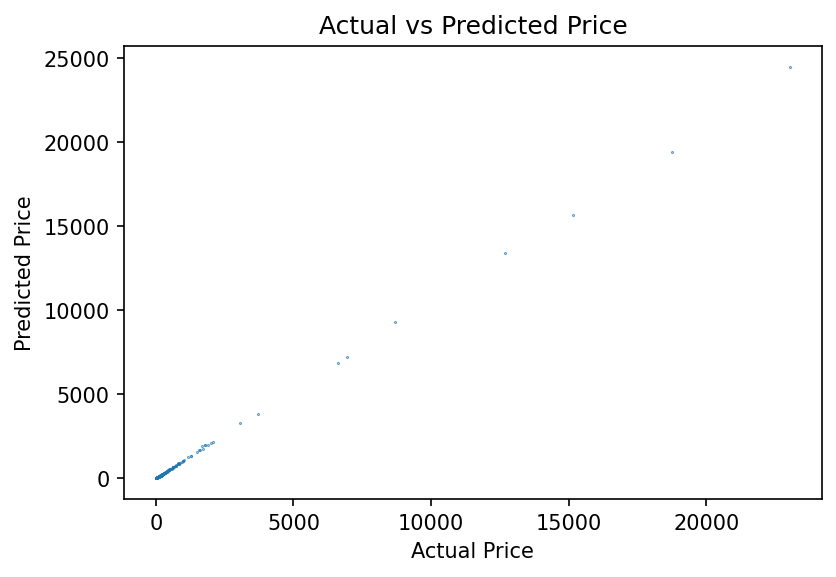

In [ ]:
preds_test = mlp.predict(X_test)
plt.scatter(y_test, preds_test, s= 0.1)
plt.ylabel("Predicted Price")
plt.xlabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [ ]:
preds_train= mlp.predict(X_train)
pricing_error_train = (preds_train - y_train)
pricing_error_train.describe()

179184   -0.063518
214275   -0.050582
308034    0.011547
216556   -0.103305
67391     0.245421
Name: Call Price, dtype: float64

In [ ]:
len(pricing_error_train[pricing_error_train > 50])

92